In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df =pd.read_csv('/kaggle/input/bitcoin-and-ethereum-prices-from-start-to-2023/BTC-USD (2014-2024).csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [3]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN
3412,2024-01-21,41671.488281,41693.160156,41615.140625,41623.695313,41623.695313,1.127404e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


In [5]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(3412, 7)

<Axes: >

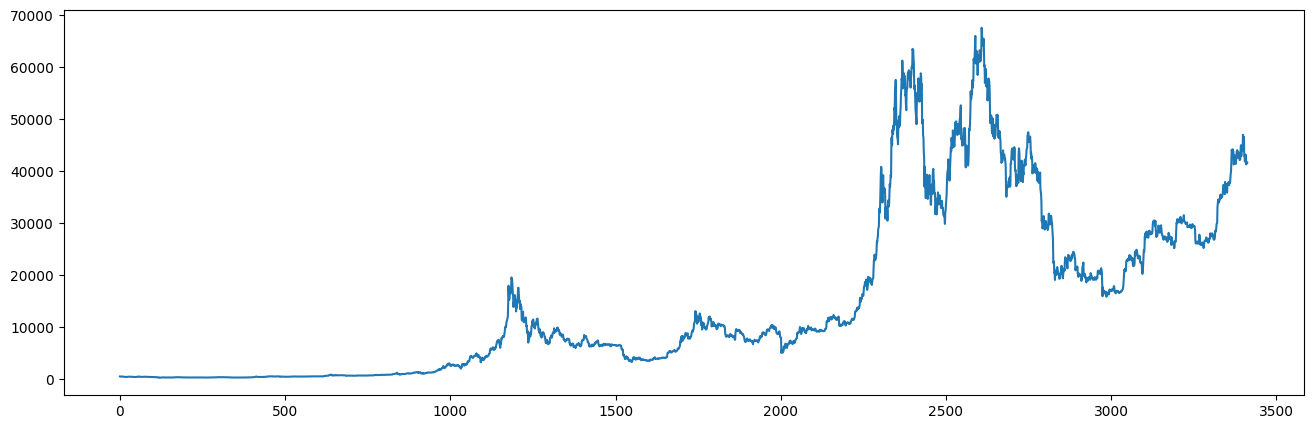

In [8]:
# ploting chart
plt.figure(figsize=(16,5))
df['Adj Close'].plot()

In [9]:
# change Data type
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3412 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3412 non-null   datetime64[ns]
 1   Open       3412 non-null   float64       
 2   High       3412 non-null   float64       
 3   Low        3412 non-null   float64       
 4   Close      3412 non-null   float64       
 5   Adj Close  3412 non-null   float64       
 6   Volume     3412 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 213.2 KB


In [11]:
# set date to index
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


# Method : 1

In [13]:
# Testing data is stationery
test_result=adfuller(df['Adj Close'])
# check pvalue is greater than siginficance
test_result[1] <= 0.05

False

In [14]:
# Make data is stationery using differencing method
df['First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

# seasonal differnce
df['Seasonal First Difference']=df['Adj Close']-df['Adj Close'].shift(12)
df.head()

,Open,High,Low,Close,Adj Close,Volume,First Difference,Seasonal First Difference
Date,,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-29.644012,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,14.108002,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-10.082978,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,3.330994,NaN


In [15]:
# checking  stationery after differcing
First_test_result = adfuller(df['First Difference'].dropna())
First_test_result[1] <= 0.05

True

In [16]:
# checking  stationery after differcing seasonal differencing
second_test_result = adfuller(df['Seasonal First Difference'].dropna())
second_test_result[1] <= 0.05

True

<Axes: xlabel='Date'>

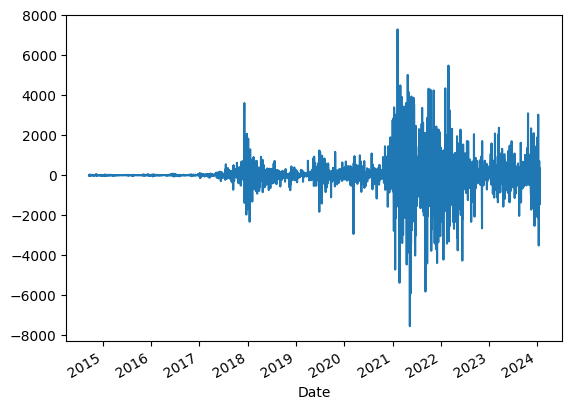

In [17]:
# plot first oreder diffencing
df['First Difference'].plot()

<Axes: xlabel='Date'>

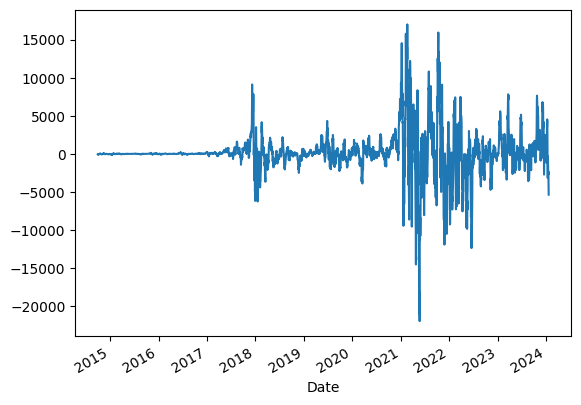

In [18]:
# plot Seasonal First Difference
df['Seasonal First Difference'].plot()

<Figure size 1500x800 with 0 Axes>

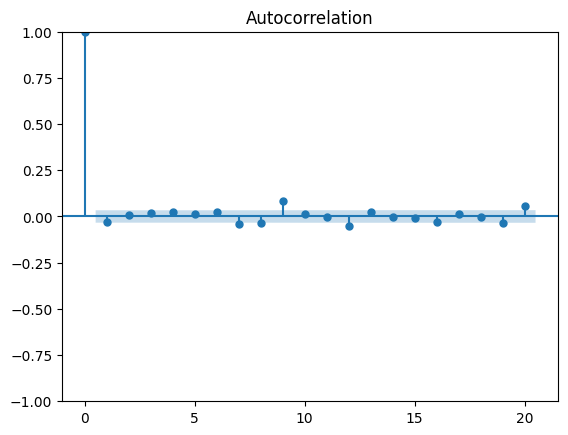

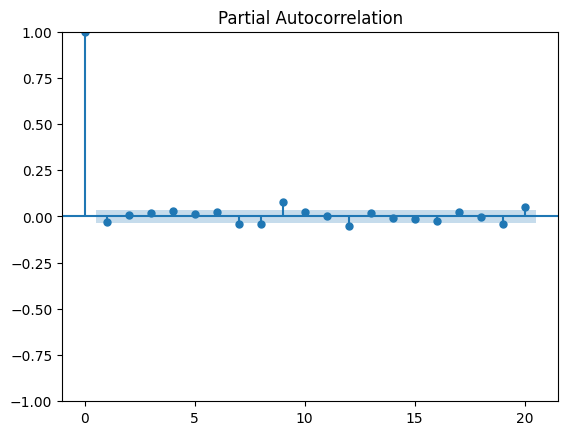

In [19]:
#plot ACF AND PACF
fig = plt.figure(figsize=(15,8))
fig = plot_acf(df['First Difference'].dropna(),lags=20)
fig = plot_pacf(df['First Difference'].dropna(),lags=20)

<Figure size 1500x800 with 0 Axes>

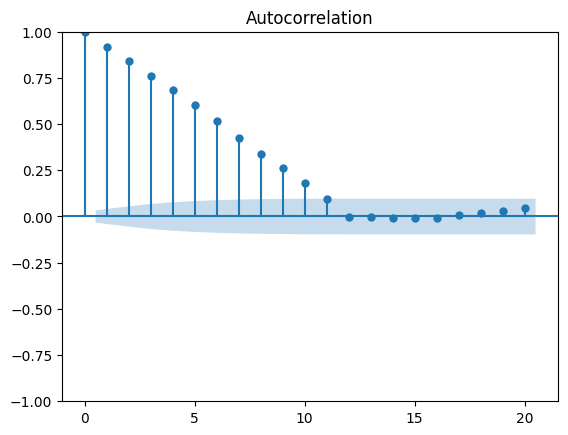

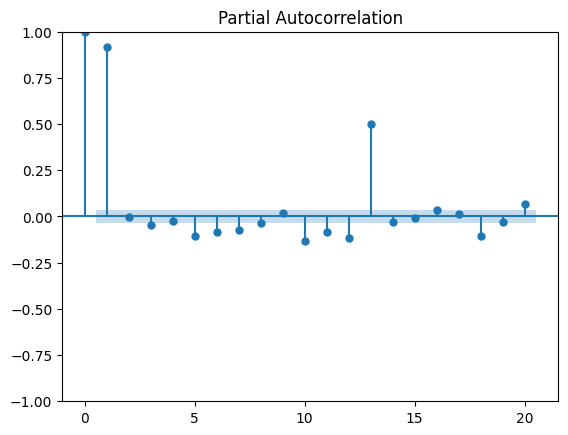

In [20]:
# for Seasonal First Difference
fig = plt.figure(figsize=(15,8))
fig = plot_acf(df['Seasonal First Difference'].dropna(),lags=20)
fig = plot_pacf(df['Seasonal First Difference'].dropna(),lags=20)


In [21]:
to_row = int(len(df)*0.9)

# Split the data
train_data = df[:to_row]['First Difference']
test_data = df[to_row:]['First Difference']

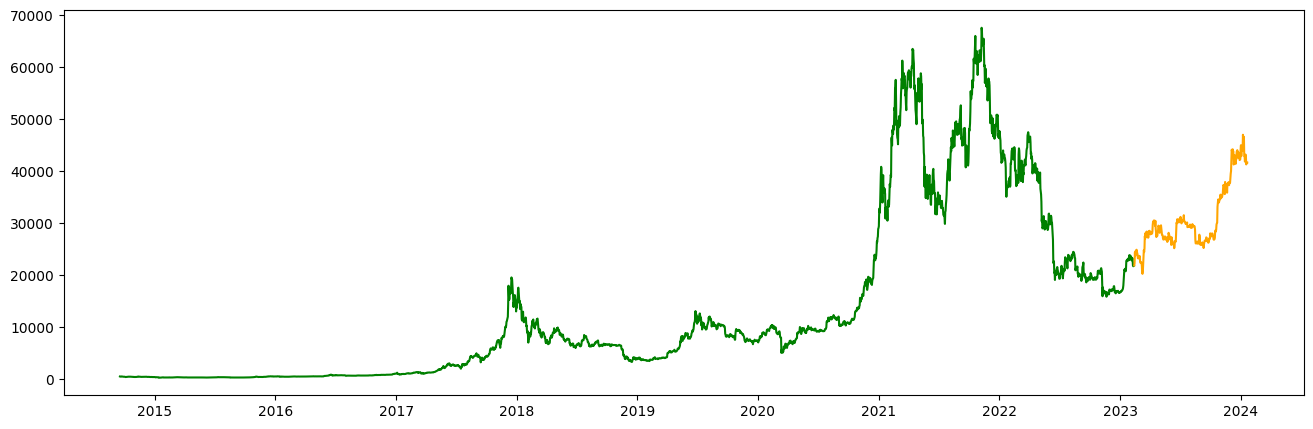

In [22]:
# plot splited data
plt.figure(figsize=(16,5))
plt.plot(df[:to_row]['Adj Close'],color='Green',label="train")
plt.plot(df[to_row:]['Adj Close'],color='orange',label="test")

In [23]:
# Arima model Building
model=ARIMA(train_data,order=(1,1,1))
model_fit=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

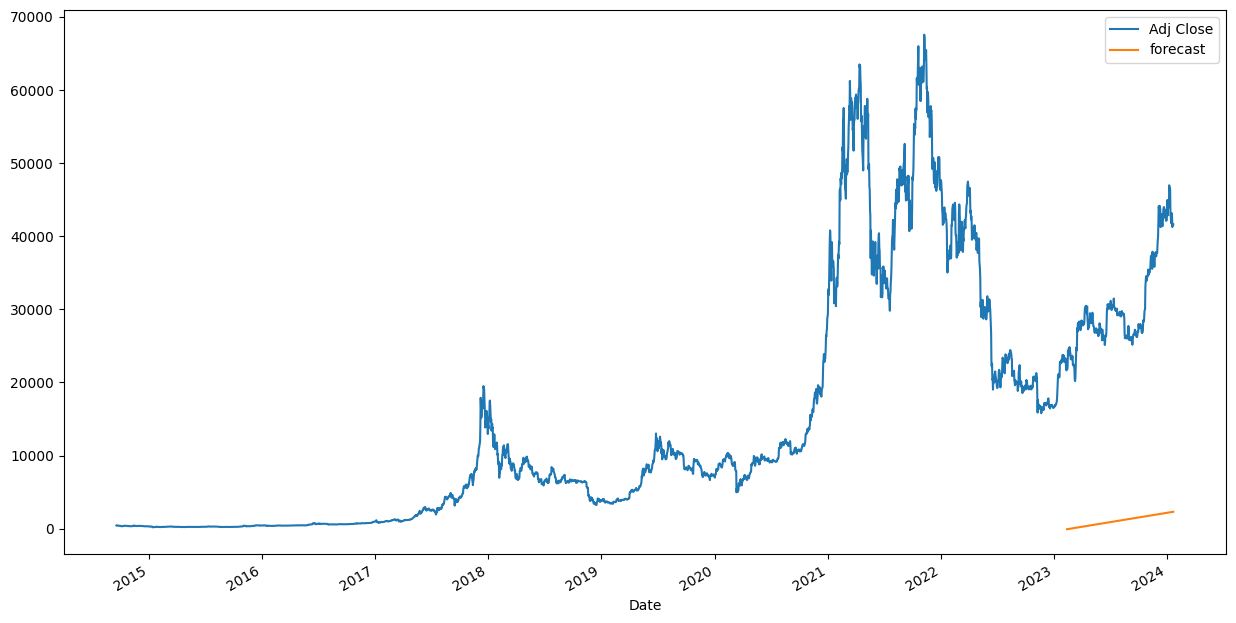

In [24]:
forecast_diff=model_fit.predict(start=max(train_data.index),end=max(test_data.index))

# invert differenced prediction to  orginal scale
df['forecast'] = train_data.iloc[-1] + np.cumsum(forecast_diff)

df[['Adj Close','forecast']].plot(figsize=(15,8))

In [25]:
train_data = df[:to_row]['Seasonal First Difference']
test_data = df[to_row:]['Seasonal First Difference']

In [26]:
# Try another model SARIMAX
sr_model=SARIMAX(train_data,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=sr_model.fit()
sarimax_forecast_diff =results.predict(start=max(train_data.index),end=max(test_data.index))

# invert differenced prediction to  orginal scale
df['forecast_sr'] = train_data.iloc[-12] + np.cumsum(sarimax_forecast_diff)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64278D+00    |proj g|=  3.77214D-02


 This problem is unconstrained.



At iterate    5    f=  8.62847D+00    |proj g|=  3.06875D-03

At iterate   10    f=  8.62602D+00    |proj g|=  3.78470D-04

At iterate   15    f=  8.62518D+00    |proj g|=  1.11244D-02
  ys=-1.005E-01  -gs= 1.339E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     40      1     1     0   1.778D-02   8.367D+00
  F =   8.3671214004892107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='Date'>

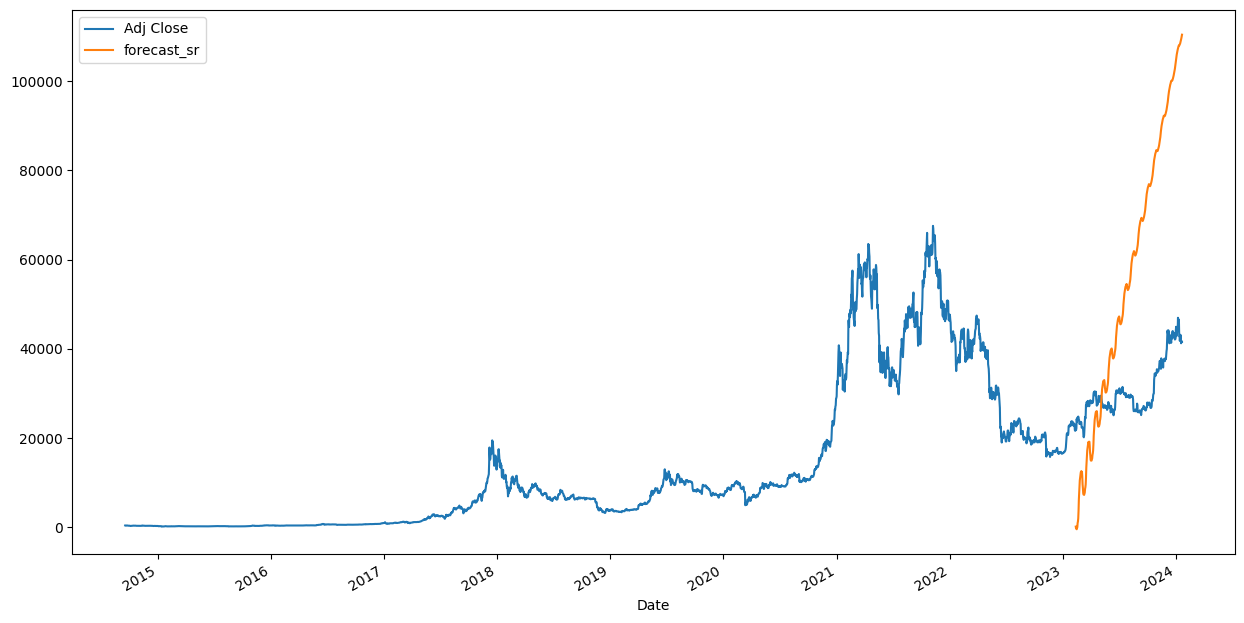

In [27]:
# plot sarimax model prediction
df[['Adj Close','forecast_sr']].plot(figsize=(15,8))

#  Method : 2

In [28]:
# convert splited data to list

train_data = df[:to_row]['Adj Close']
test_data = df[to_row:]['Adj Close']

train_data_list = list(train_data)
test_data_list = list(test_data)

In [29]:
model_pred =[]
num_of_ob = len(test_data_list)

p=1
q=1
d=1

for i in range(num_of_ob):
    model = ARIMA(train_data_list, order=(p, d, q))
    arima_model = model.fit()
    output = arima_model.forecast()
    y_hat = output[0]
    model_pred.append(y_hat)
    actual_test_value=test_data_list[i]
    train_data_list.append(actual_test_value)

In [30]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3411
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27572.425
Date:                Fri, 05 Apr 2024   AIC                          55150.851
Time:                        08:51:06   BIC                          55169.254
Sample:                             0   HQIC                         55157.427
                               - 3411                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1103      0.303     -0.364      0.716      -0.704       0.483
ma.L1          0.0815      0.304      0.268      0.789      -0.514       0.678
sigma2      6.184e+05   5039.698    122.698      0.0

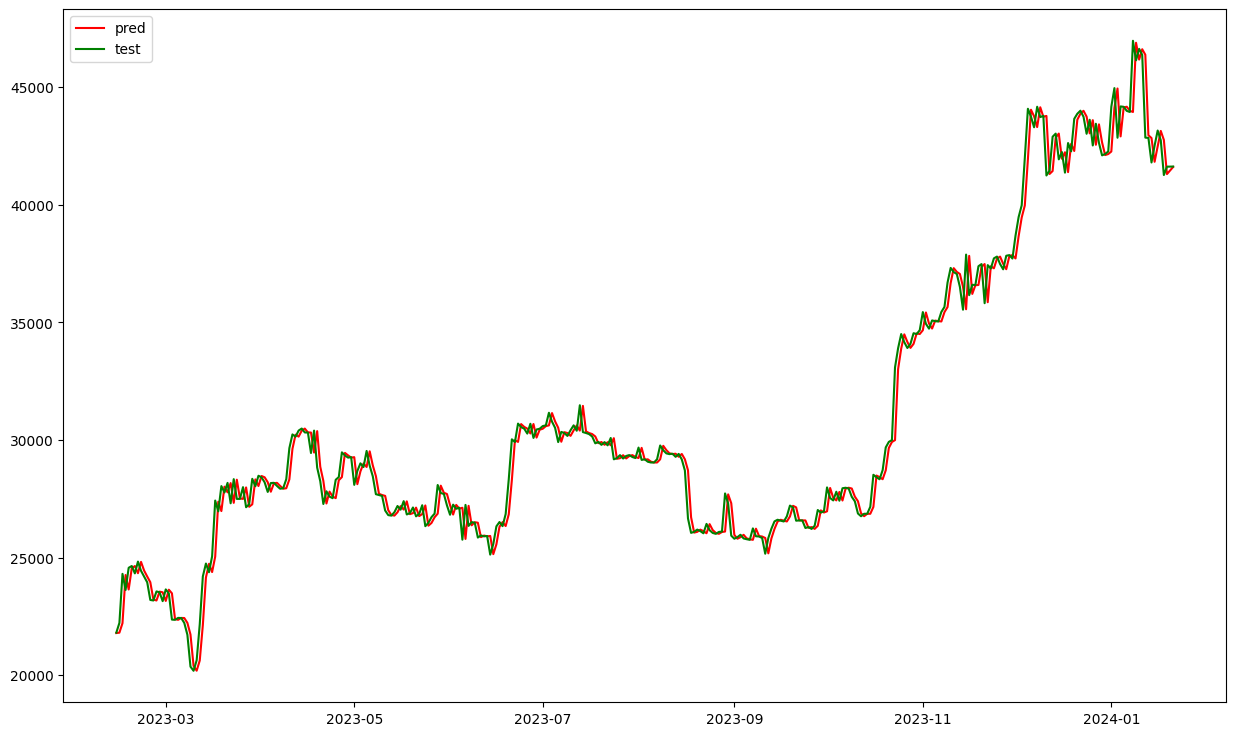

In [31]:
plt.figure(figsize=(15,9))
date_range = df[to_row:].index
plt.plot(date_range,model_pred,color='Red',label='pred')
plt.plot(date_range,test_data_list,color='Green',label='test')
plt.legend()
plt.show()

# Method : 3 Using LSTM

In [32]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-04-05 08:51:08.846031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 08:51:08.846147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 08:51:08.972491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
dfnew = df[['Open','High','Low','Close','Adj Close','Volume']]
dfnew.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dfnew[['Adj Close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [35]:
sequence_length = 20

# Create input sequences and targets
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and validation sets
train_size = int(0.8 * len(X))
X_train, X_valid = X[:train_size], X[train_size:]
y_train, y_valid = y[:train_size], y[train_size:]

In [36]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((2713, 20, 1), (2713, 1), (679, 20, 1), (679, 1))

In [37]:
model = Sequential([
    LSTM(units=50, return_sequences=True,activation='relu', input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=True,activation='relu'),
    LSTM(units=50,activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=20, validation_split=0.2, callbacks=[early_stopping],)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
 24/109 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040

I0000 00:00:1712307085.541308      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0018 - val_loss: 0.0233
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3517e-04 - val_loss: 0.0074
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6349e-04 - val_loss: 0.0061
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3623e-04 - val_loss: 0.0099
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3659e-04 - val_loss: 0.0063
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2428e-04 - val_loss: 0.0061
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2610e-04 - val_loss: 0.0179
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9725e-05 - val_loss: 0.0217
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1892e-05 - val_loss: 0.0234
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1931e-05 - val_loss: 0.0280
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6430e-05 - val_loss: 0.0211
Epoch 12/20
109/109 ━

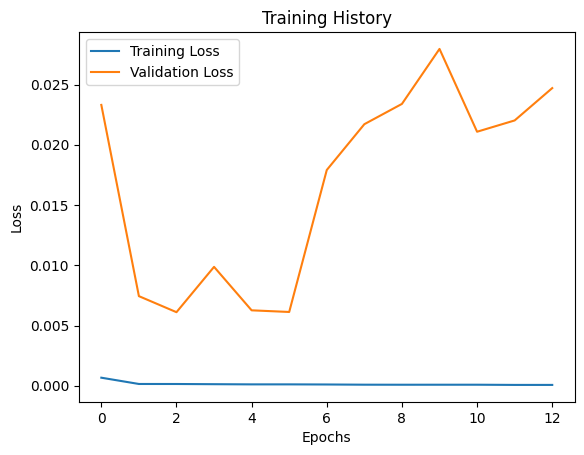

In [38]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


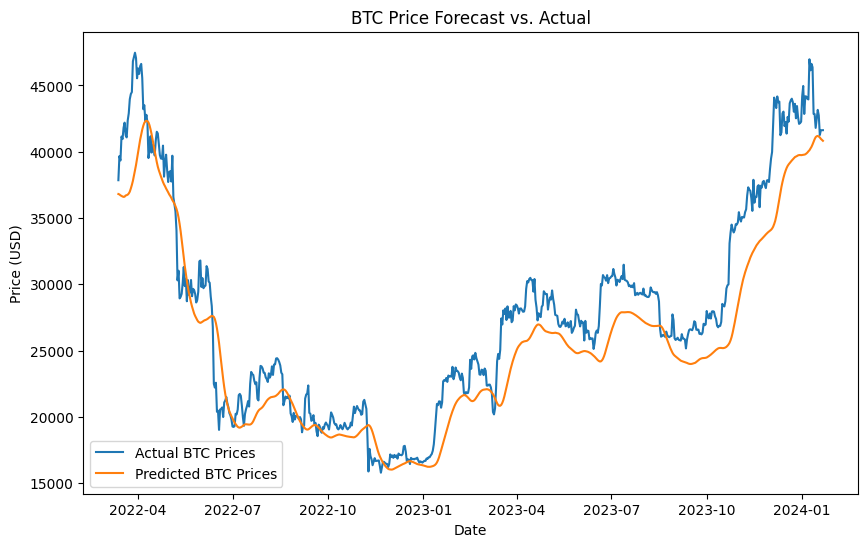

In [39]:
y_hat = model.predict(X_valid)

y_hat_actual = scaler.inverse_transform(y_hat)

y_valid_actual = scaler.inverse_transform(y_valid.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(dfnew.index[train_size + sequence_length:], y_valid_actual, label='Actual BTC Prices')
plt.plot(dfnew.index[train_size + sequence_length:], y_hat_actual, label='Predicted BTC Prices')
plt.title('BTC Price Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()